In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder # لتغير المحارف الى أرقام 
from sklearn.impute import SimpleImputer # لملئ القيم المفقودة بالمتوسط 
from sklearn.compose import make_column_transformer  # لتحديد خوارزمية على كل عامود 
from sklearn.compose import make_column_selector # لأختيار عامود بطريقة محددة



In [76]:
data = pd.DataFrame({'Fare':[1,2,3,4,5],'Embarked':['S','Q','S','C','S'],
                    'Sex':['male','female','male','male','female'],
                    'Age':[22.,35,26,40,np.nan]})

In [77]:
data

,Fare,Embarked,Sex,Age
0,1,S,male,22.0
1,2,Q,female,35.0
2,3,S,male,26.0
3,4,C,male,40.0
4,5,S,female,NaN


In [78]:
ohe = OneHotEncoder()
imp = SimpleImputer()

In [79]:
ct = make_column_transformer((ohe,['Embarked','Sex']),
                             (imp,['Age']),remainder='passthrough')

In [80]:
ct.fit_transform(data)

array([[ 0.  ,  0.  ,  1.  ,  0.  ,  1.  , 22.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  ,  1.  ,  0.  , 35.  ,  2.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  1.  , 26.  ,  3.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  1.  , 40.  ,  4.  ],
       [ 0.  ,  0.  ,  1.  ,  1.  ,  0.  , 30.75,  5.  ]])

In [81]:
# طرق عدة لتنفيذ الخوارزمية على الأعمدة 
ct = make_column_transformer((ohe,['Embarked','Sex']))
ct = make_column_transformer((ohe,[1,2]))
ct = make_column_transformer((ohe,slice(1,3)))
ct = make_column_transformer((ohe,make_column_selector(pattern='E|S')))
ct = make_column_transformer((ohe,make_column_selector(dtype_include=object)))

In [82]:
ct.fit_transform(data)

array([[0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

In [83]:
data = pd.read_csv('spam.csv',sep='\t' ,encoding_errors='ignore')

In [84]:
data['status'] = data['v1,v2,,,'].apply(lambda x:x[:4])
data['massage'] = data['v1,v2,,,'].apply(lambda x:x[5:])

In [85]:
data.drop(['v1,v2,,,'],axis=1,inplace=True)

In [86]:
data['status'] = data['status'].str.replace(',','')

In [87]:
data

,status,massage
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,"k lar... Joking wif u oni...,,,"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,dun say so early hor... U c already then say....
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,"""This is the 2nd time we have tried 2 contact ..."
5570,ham,"ill _ b going to esplanade fr home?,,,"
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,he guy did some bitching but I acted like i'd ...


In [88]:
data['status'].value_counts()

ham     4825
spam     747
ham"       2
Name: status, dtype: int64

In [89]:
data = data[~(data['status']=='ham"')]

In [90]:
data.loc[data['status']=='ham','status'] = 1
data.loc[data['status']=='spam','status'] = 0

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12492\1473265170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['status']=='ham','status'] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12492\1473265170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['status']=='spam','status'] = 0


In [91]:
data

,status,massage
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,"k lar... Joking wif u oni...,,,"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,dun say so early hor... U c already then say....
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,0,"""This is the 2nd time we have tried 2 contact ..."
5570,1,"ill _ b going to esplanade fr home?,,,"
5571,1,"Pity, * was in mood for that. So...any other s..."
5572,1,he guy did some bitching but I acted like i'd ...


In [92]:
X = data['massage']
y = data['status']

In [93]:
from sklearn.feature_extraction.text import CountVectorizer # لجعل النص رقمي 
from sklearn.model_selection import train_test_split

In [94]:
cv = CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
X_traincv = cv.fit_transform(X_train)

In [96]:
a = X_traincv.toarray()

In [97]:
a[0].reshape(1,-1)

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [98]:
cv.inverse_transform(a[0].reshape(1,-1))

[array(['aight', 'and', 'at', 'back', 'by', 'door', 'for', 'get', 'll',
        'me', 'mu', 'need', 're', 'somebody', 'swing', 'text', 'the', 'to',
        'when', 'you'], dtype='<U34')]

In [99]:
X_train.iloc[0]

'Aight text me when you\'re back at mu and I\'ll swing by, need somebody to get the door for me",,,'

In [100]:
cv = CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [101]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [102]:
data = pd.DataFrame({'shape':['square','square','oval','circle'],
                     'Class':['third','first','second','third'],
                     'Size':['S','S','L','XL']})

In [103]:
data

,shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


In [104]:
# طريقة التحويل هي جعل كل عنصر في العامود عامود لوحده
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(data[['shape']])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [105]:
# طريقة التحويل يعطي قيمة رقمية لكل عنصر في العامود 
oe = OrdinalEncoder(categories=[['first','second','third'],['S','M','L','XL']])
oe.fit_transform(data[['Class','Size']])

array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

In [110]:
# handle_unknown تجاهل اذا كان هنالك قيمة في الهدف غير موجودة بالصفات 
# أن لم نفعل ذلك فسوف يحدث على المحرف الغير موجود
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [111]:
data = pd.DataFrame({'col':['A','B','C','B']})

In [112]:
data

,col
0,A
1,B
2,C
3,B


In [113]:
ohe.fit_transform(data[['col']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [114]:
data_new = pd.DataFrame({'col':['A','C','D']})

In [115]:
ohe.transform(data_new[['col']])

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [116]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline # لا نحتاج الى تعريف أسم الخوارزمية 

In [117]:
imputer = SimpleImputer()
lr = LogisticRegression()

In [118]:
pipe  = make_pipeline(imputer,lr)
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [119]:
train =pd.DataFrame({'feat1':[10,20,np.nan,2],
                    'feat2':[25,20,5,3],
                    'label':['A','A','B','B']})

train

,feat1,feat2,label
0,10.0,25,A
1,20.0,20,A
2,NaN,5,B
3,2.0,3,B


In [120]:
test =pd.DataFrame({'feat1':[30,5,15],
                    'feat2':[12,10,np.nan]})

test

,feat1,feat2
0,30,12.0
1,5,10.0
2,15,NaN


In [121]:
feat = ['feat2','feat2']

In [122]:
X,y = train[feat] ,train['label']
X_new = test[feat]

In [123]:
pipe.fit(X,y)

pipe.predict(X_new)

array(['B', 'B', 'A'], dtype=object)

In [124]:
# تقوم بالتنبوء بالقيمة المفقودة
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
 # يختار السطور ذات القيم الأقرب الى سطر القيم المفقودة ويقوم بحساب المتوسط\
from sklearn.impute import KNNImputer

In [125]:
data = pd.DataFrame({'SibSp':[1,1,0,1,0,0],
                    'Fare':[7.2500,71.2833,7.9250,53.1000,8.0500,8.4583],
                    'Age':[22,38,26,35,35,np.nan]})

data

,SibSp,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
5,0,8.4583,NaN


In [126]:
impute_it = IterativeImputer()
impute_it.fit_transform(data)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       [ 1.        , 53.1       , 35.        ],
       [ 0.        ,  8.05      , 35.        ],
       [ 0.        ,  8.4583    , 28.50639495]])

In [127]:
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(data)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 30.5   ]])

In [55]:
# هذا النموذج يقوم بمعالجة القيم المفقودة لوحده
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [6]:
from sklearn import datasets
iris = datasets.load_iris()

In [8]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x:iris.target_names[x])


In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33)

In [20]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.96

In [21]:
from sklearn.model_selection import cross_val_score # نتيجة المودل في كل تقسيم

In [43]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [26]:
cross_val_score(svm.SVC(kernel='linear',C=20,gamma='auto'),iris.data,iris.target,cv=5)

array([1.        , 1.        , 0.9       , 0.93333333, 1.        ])

In [27]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [28]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [30]:
import numpy as np
kval = ['rbf','linear']
C= [1,10,20]
avg_scores ={}
for i in kval:
    for j in C:
        cv_scores = cross_val_score(svm.SVC(kernel=i,C=j,gamma='auto'),iris.data,iris.target,cv=5)
        avg_scores[i +'_'+ str(j)] = np.average(cv_scores)

In [31]:
avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [51]:
# إختيار أفضل المعاملات 
from sklearn.model_selection import GridSearchCV


dict_keys(['cv', 'error_score', 'estimator__C', 'estimator__break_ties', 'estimator__cache_size', 'estimator__class_weight', 'estimator__coef0', 'estimator__decision_function_shape', 'estimator__degree', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__probability', 'estimator__random_state', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [57]:
X = iris.data
y = iris.target

svm = SVC()
param_grid = {
    'kernel':['rbf','linear'],
     'C':[1,10,20]
}

model = GridSearchCV(
    estimator = svm,
    param_grid= param_grid,
    scoring='accuracy',
    verbose=10,
    n_jobs=1,
    cv=5 
  )
model.fit(X,y)
print(model.best_score_)
print(model.best_estimator_.get_params())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=1, kernel=rbf.............................................
[CV 1/5; 1/6] END ..............C=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5; 1/6] START C=1, kernel=rbf.............................................
[CV 2/5; 1/6] END ..............C=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5; 1/6] START C=1, kernel=rbf.............................................
[CV 3/5; 1/6] END ..............C=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5; 1/6] START C=1, kernel=rbf.............................................
[CV 4/5; 1/6] END ..............C=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5; 1/6] START C=1, kernel=rbf.............................................
[CV 5/5; 1/6] END ..............C=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5; 2/6] START C=1, kernel=linear..........................................
[CV 1/5; 2/6] END ...........C=1, kernel=linear;,

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
model = RandomizedSearchCV(
    estimator = svm,
    param_distributions= param_grid,
    scoring='accuracy',
    n_iter= 10,
    verbose=10,
    n_jobs=1,
    cv=5 
  )
model.fit(X,y)
print(model.best_score_)
print(model.best_estimator_.get_params())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=1, kernel=rbf.............................................
[CV 1/5; 1/6] END ..............C=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5; 1/6] START C=1, kernel=rbf.............................................
[CV 2/5; 1/6] END ..............C=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5; 1/6] START C=1, kernel=rbf.............................................
[CV 3/5; 1/6] END ..............C=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5; 1/6] START C=1, kernel=rbf.............................................
[CV 4/5; 1/6] END ..............C=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5; 1/6] START C=1, kernel=rbf.............................................
[CV 5/5; 1/6] END ..............C=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5; 2/6] START C=1, kernel=linear..........................................
[CV 1/5; 2/6] END ...........C=1, kernel=linear;,

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA # لنقلل عدد الأبعاد 

In [4]:
data = load_breast_cancer()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])

In [8]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

In [18]:
df_sc

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [27]:
pca = PCA(n_components=2) # تقليل من 30 بعد الى بعدين

In [28]:
pca_x = pca.fit_transform(df_sc)

In [29]:
df_sc.shape

(569, 30)

In [30]:
pca_x.shape

(569, 2)

Text(0, 0.5, 'second principle component')

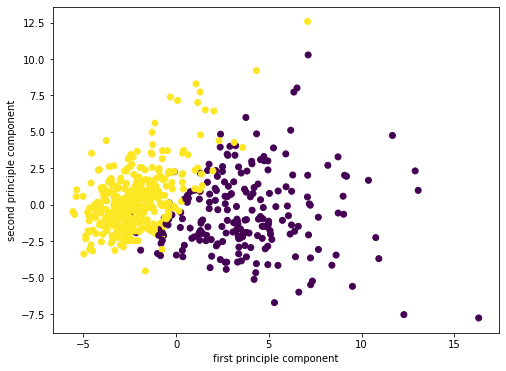

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(pca_x[:,0],pca_x[:,1],c=data['target'])
plt.xlabel('first principle component')
plt.ylabel('second principle component')